## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor

In [2]:
from autogen.coding import LocalCommandLineCodeExecutor

C:\Users\dlr93\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [23]:
import os


current_directory = os.getcwd()


executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir=current_directory,
)


## Create agents

In [4]:
from autogen import ConversableAgent, AssistantAgent

### 1. Agent with code executor configuration

In [5]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability

In [6]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## The task!

Ask the two agents to collaborate on a stock analysis task.

In [9]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

In [10]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-06-11. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the Year-To-Date (YTD) stock gains for NVIDIA (NVDA) and Tesla (TSLA), we can use Python libraries such as `pandas` for data manipulation and `matplotlib` for plotting.

Our plan involves the following steps:
1. Get the stock prices from the start of the year (2024) to today (2024-06-11) for NVDA and TSLA.
2. Calculate daily stock gains.
3. Plot the gains and save the plot to a file `ytd_stock_gains.png`.

Let's go step by step.

### Step 1: Get Stock Data
I will provide you with Python code to get the stock data for NVDA and TSLA. To run this code, you will need to ensure you have installed the `pandas`, `pandas_datareade


--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING 3 CODE BLOCKS (inferred languages are [sh, sh, python])...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: C:\Users\dlr93\OneDrive\Documentos\Master\Courses\Other : El término 
'C:\Users\dlr93\OneDrive\Documentos\Master\Courses\Other' no se reconoce como nombre de un cmdlet, función, archivo de 
script o programa ejecutable. Compruebe si escribió correctamente el nombre o, si incluyó una ruta de acceso, 
compruebe que dicha ruta es correcta e inténtelo de nuevo.
En línea: 1 Carácter: 1
+ C:\Users\dlr93\OneDrive\Documentos\Master\Courses\Other Courses\AI Ag ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : ObjectNotFound: (


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The error indicates an issue with the `pandas_datareader` library when trying to fetch stock data from Yahoo Finance, specifically related to parsing the data returned from Yahoo's API. It appears that the structure of the response from Yahoo might have changed, or the endpoint might be temporarily unavailable or not responding as expected.

An alternative approach is to use a different library or method to fetch the required data. One such library frequently used in financial analysis and compatible with many data sources, including Alpha Vantage, is `yfinance`. It is robust and often used as an alternative for stock data retrieval after Yahoo Finance's API became unreliable.

Let’s proceed with `yfinance` to fetch the stock data and update the script accordingly:

1. First, install `yfinance` if it is not already installed:
```sh
pip install yfinance
```

2. 

## Now let's see the plot

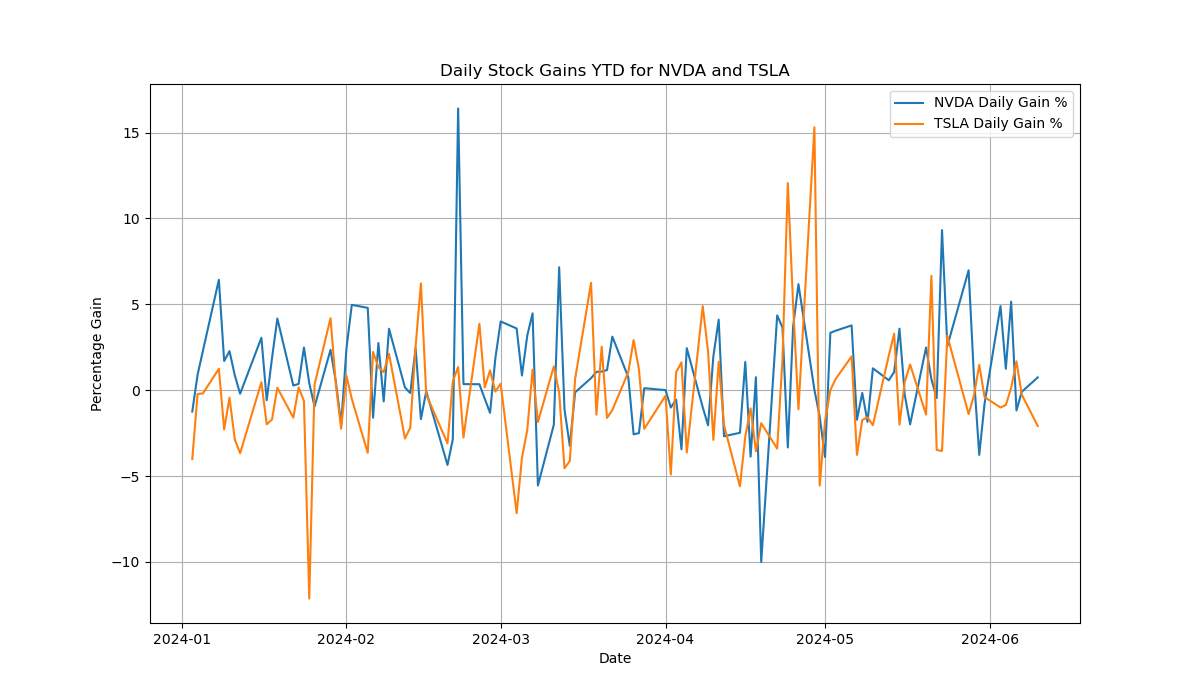

In [13]:
import os
from IPython.display import Image

Image(os.path.join(current_directory, "ytd_stock_gains.png"))

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data 
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

In [14]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [15]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [16]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir=current_directory,
    functions=[get_stock_prices, plot_stock_prices],
)

In [17]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [18]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [19]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [20]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-06-11.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To accomplish your request, we will proceed with the following steps:

1. Import the necessary function to get stock prices.
2. Fetch the YTD (Year-To-Date) stock prices for NVIDIA (NVDA) and Tesla (TSLA) stocks starting from the first day of this year up to today's date.
3. Plot the fetched stock prices.
4. Save the plot to a file named `stock_prices_YTD_plot.png`.

First, we need to fetch the stock prices. Here's the Python code to do that and subsequently plot the data:

```python
# filename: fetch_and_plot_stocks.py
from functions import get_stock_parameters, plot_stock_parameters
from datetime import datetime

# Define the stoc

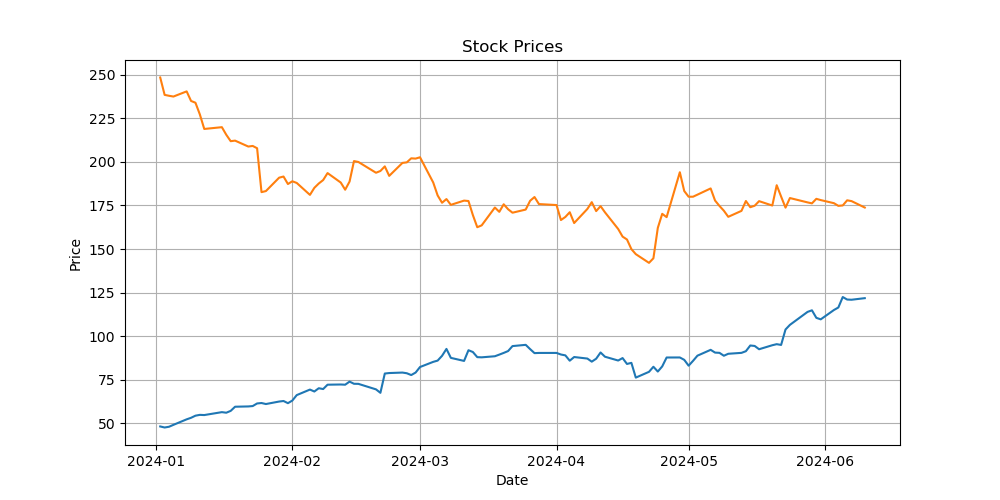

In [22]:
Image(os.path.join(current_directory, "stock_prices_YTD_plot.png"))